In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edaic-labels/train_split.csv
/kaggle/input/edaic-labels/test_split.csv
/kaggle/input/edaic-labels/Detailed_PHQ8_Labels.csv
/kaggle/input/edaic-labels/all_labels_sorted_relabeled.csv
/kaggle/input/edaic-labels/dev_split.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_012_VA_prediction.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_006_VA_prediction.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_016_VA_prediction.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_014_VA_prediction.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_025_VA_prediction.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_003_VA_prediction.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_001_VA_prediction.csv
/kaggle/input/va-time-series-affectnet-model-edaic/335_P/335_segment_008_VA_prediction.csv
/kaggle/input/va-time-series-affect

PIPELINE 1: FEATURE ENGINEERING + ANOVA + TRADITIONAL ML
PIPELINE 1: FEATURE ENGINEERING + ANOVA + TRADITIONAL ML

Pipeline Steps:
1. Extract affective dynamics features
2. ANOVA analysis for feature discrimination
3. Train multiple ML models
4. Evaluate and compare models
5. Analyze feature importance

LOADING DATA
✓ Loaded labels for 275 participants
  Label distribution: {0: 189, 1: 86}


Loading segments: 100%|██████████| 275/275 [00:24<00:00, 11.27it/s]



✓ Total segments loaded: 5461
  Label distribution: {0: 3221, 1: 2240}

FEATURE EXTRACTION

Extracting affective dynamics features...


Progress: 100%|██████████| 5461/5461 [13:03<00:00,  6.97it/s]



✓ Total features extracted: 118
  Feature names: ['valence_mean', 'valence_median', 'valence_std', 'valence_var', 'valence_min', 'valence_max', 'valence_range', 'valence_q25', 'valence_q50', 'valence_q75']...

DATA SPLITTING

✓ Train: 3822 | Val: 819 | Test: 820
  Train labels: {0: 2254, 1: 1568}
  Val labels: {0: 483, 1: 336}
  Test labels: {0: 484, 1: 336}

Normalizing features...

ANOVA ANALYSIS - FEATURE DISCRIMINATION

Số mẫu:
  Nhóm 0 (Không trầm cảm): 3221
  Nhóm 1 (Trầm cảm):       2240


ANOVA testing: 100%|██████████| 118/118 [00:00<00:00, 1325.04it/s]


Top 30 Features với sự khác biệt có ý nghĩa thống kê nhất
Ý nghĩa: *** p<0.001, ** p<0.01, * p<0.05, ns: không ý nghĩa

Feature                             F-stat     p-value      Sig   Cohen-d    Δ Mean    
------------------------------------------------------------------------------------------
arousal_masd                        286.6186   0.000000     ***   0.4659     0.0010    
arousal_rmssd                       268.8680   0.000000     ***   0.4512     0.0015    
arousal_lyapunov                    262.3352   0.000000     ***   0.4457     0.2055    
arousal_mssd                        227.3960   0.000000     ***   0.4149     0.0000    
arousal_sliding_std_mean            213.3986   0.000000     ***   0.4020     0.0016    
arousal_sliding_std_std             195.2407   0.000000     ***   0.3845     0.0012    
arousal_std                         188.9334   0.000000     ***   0.3782     0.0041    
arousal_mad                         179.9809   0.000000     ***   0.3692     0.0033 

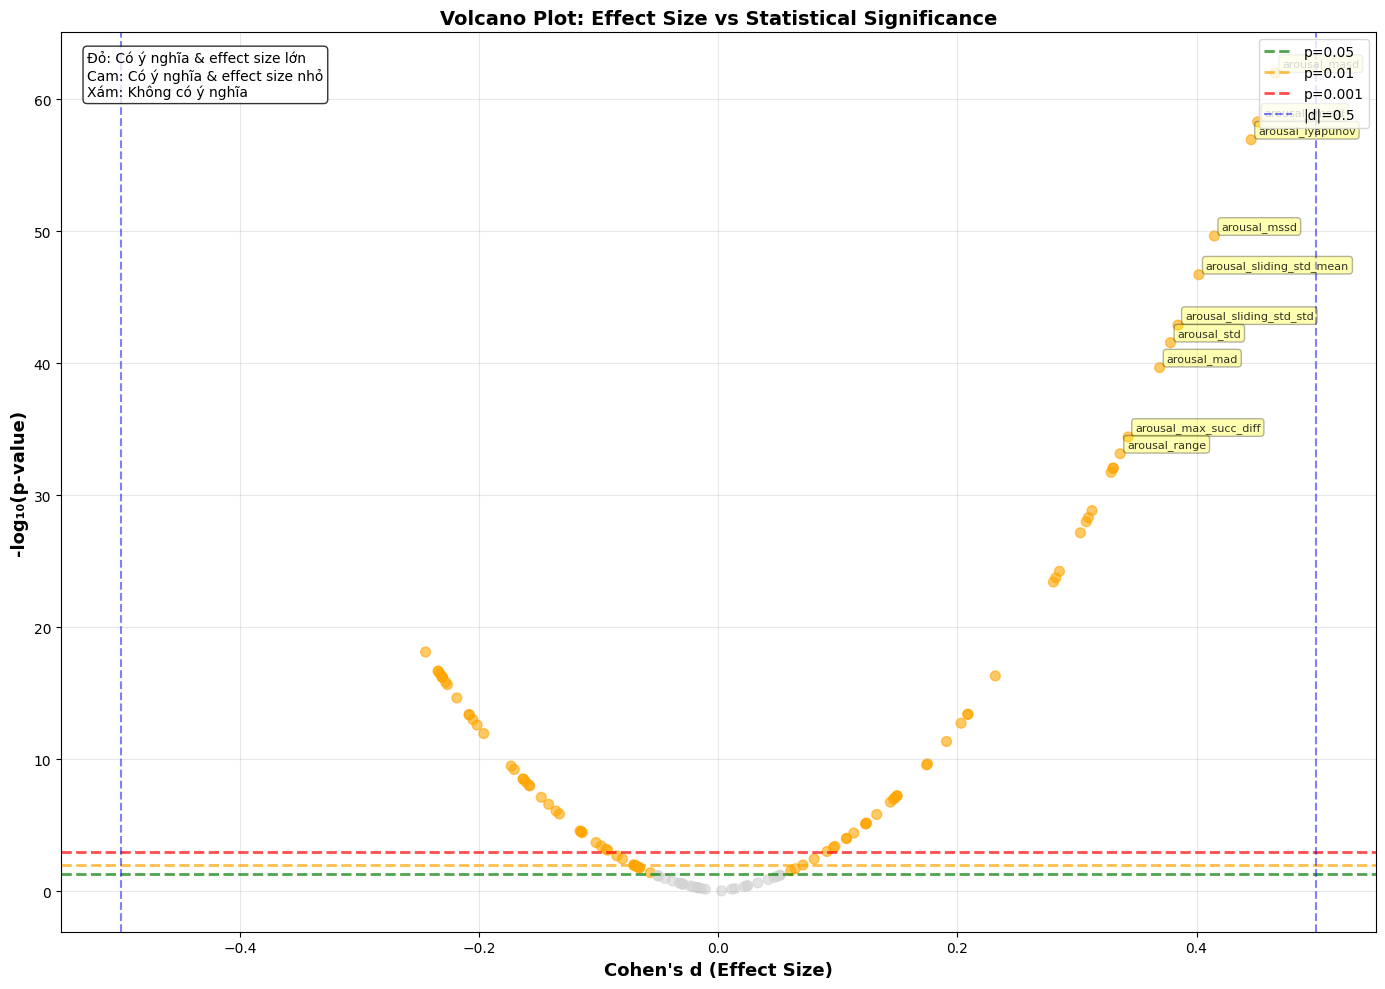

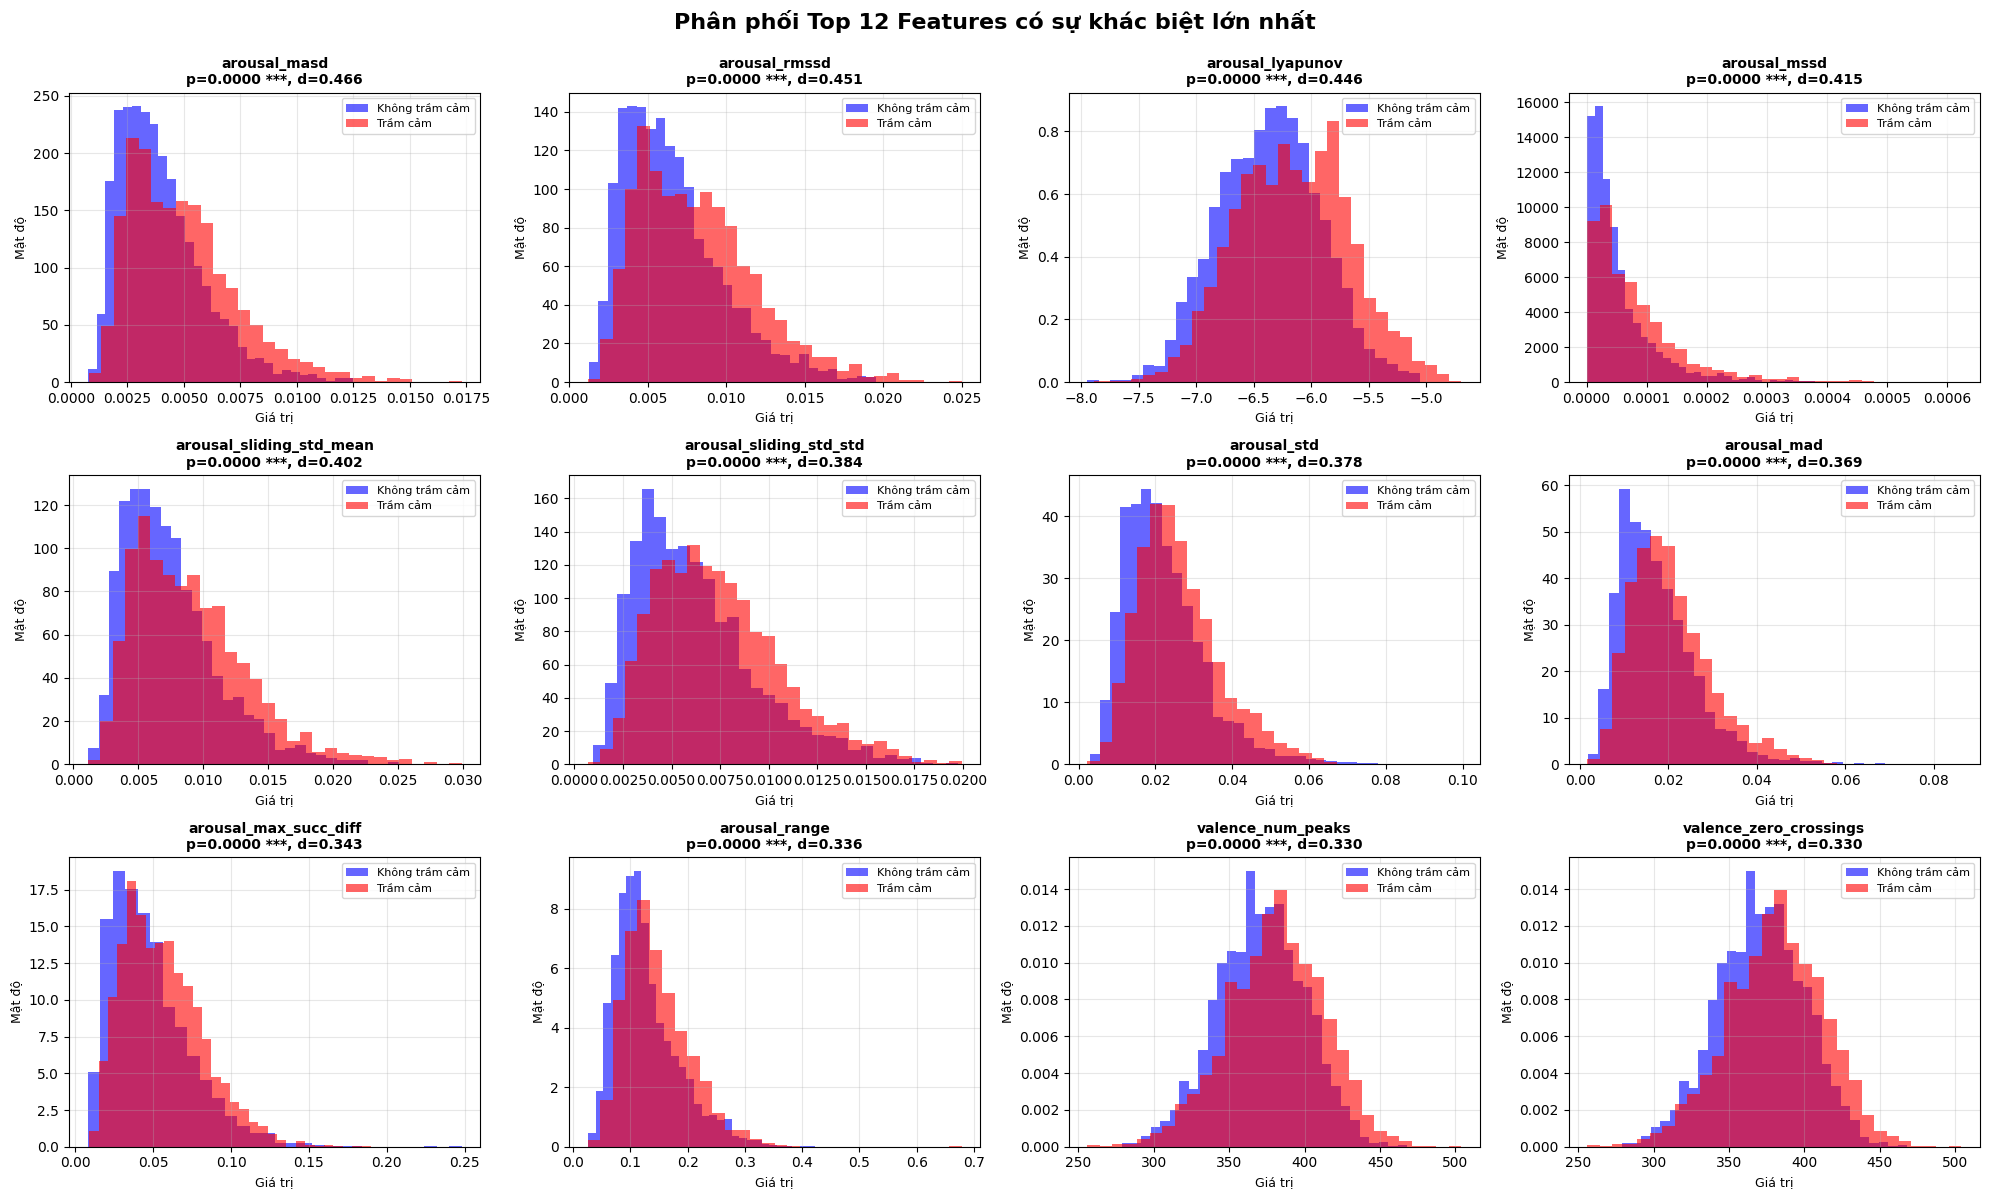

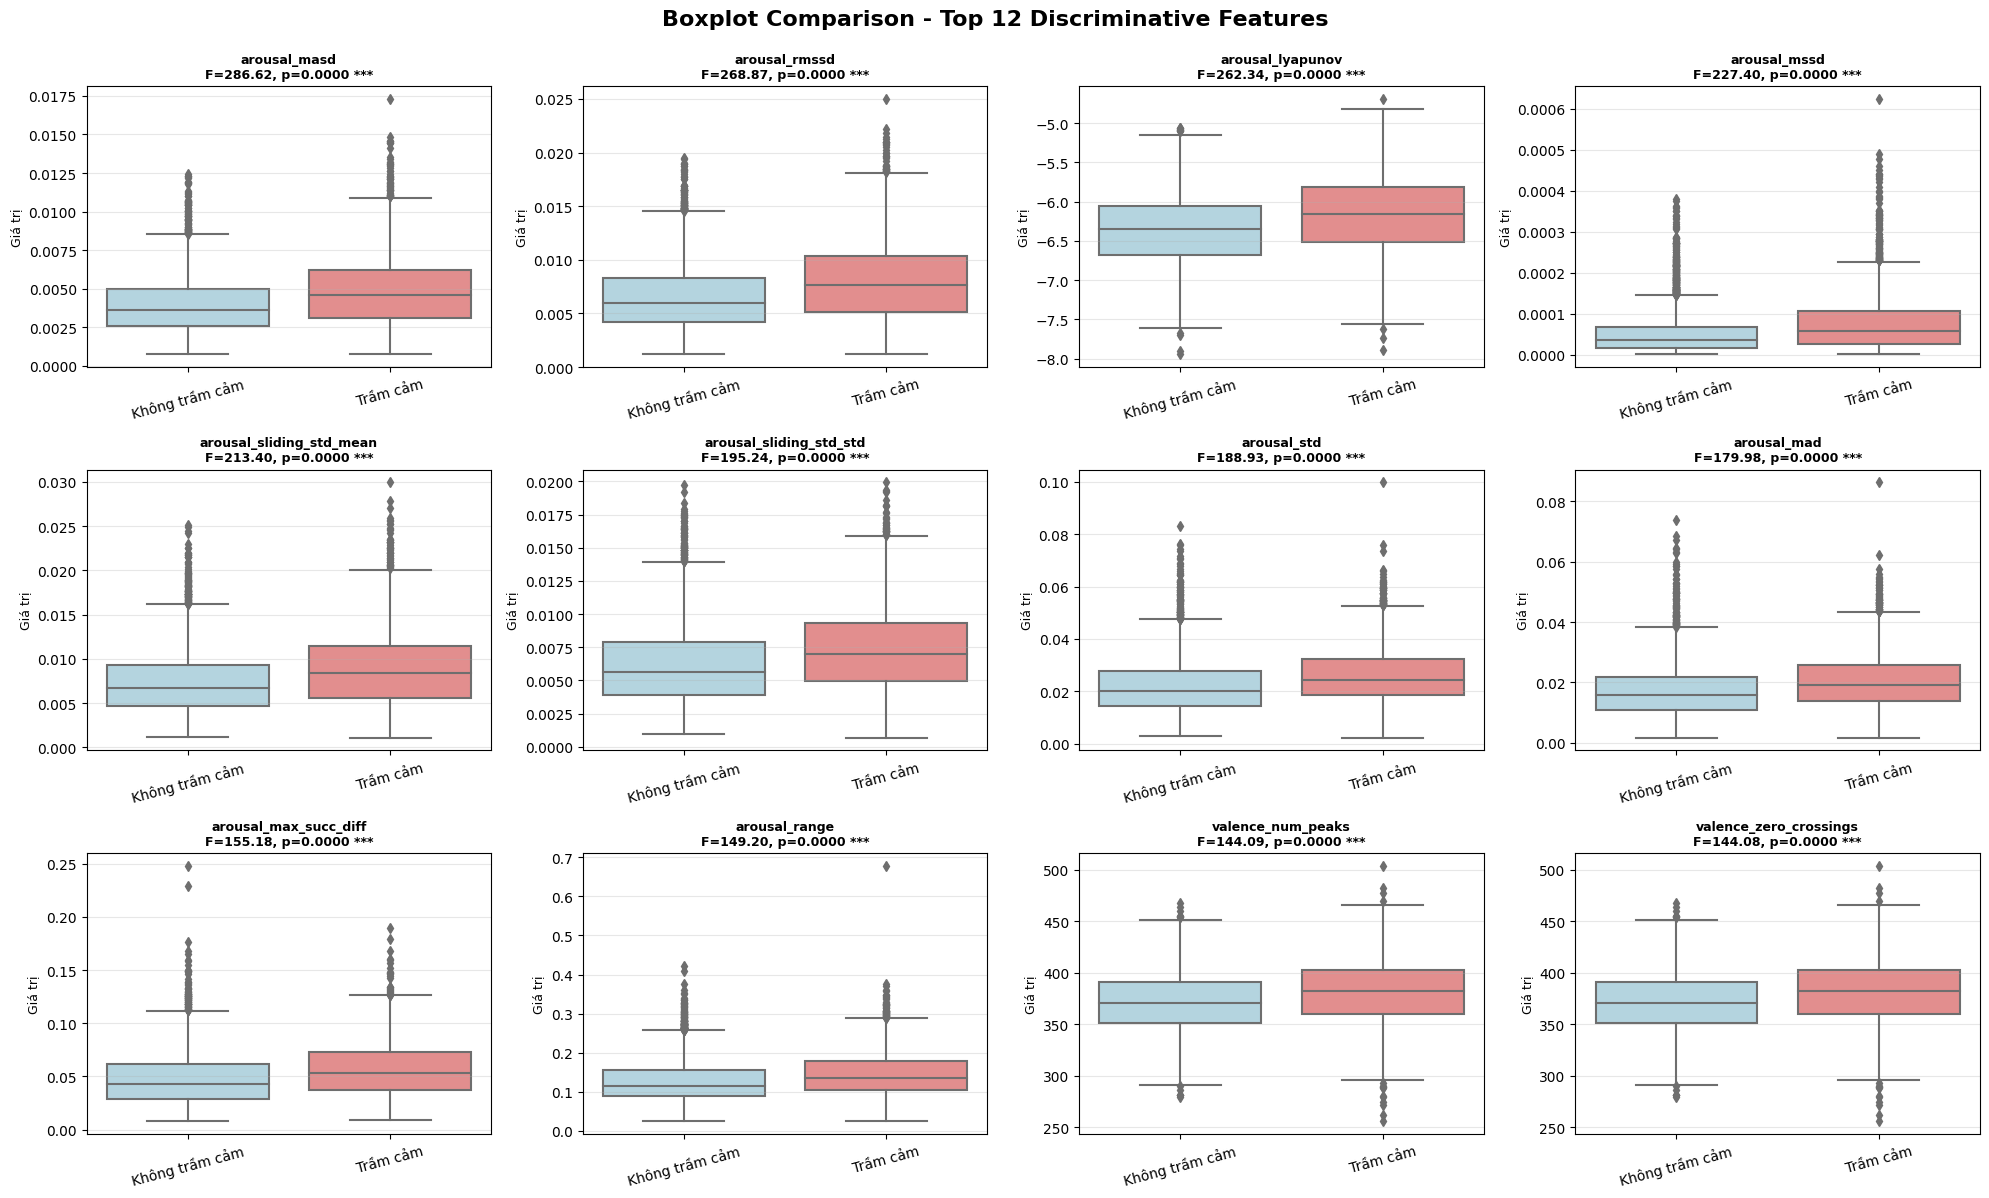


TRAINING MACHINE LEARNING MODELS

Class distribution: {0: 2254, 1: 1568}
Scale pos weight: 1.44

[1/5] Training CatBoost...
0:	test: 0.6533970	best: 0.6533970 (0)	total: 71.2ms	remaining: 35.5s
100:	test: 0.8108240	best: 0.8108240 (100)	total: 1.35s	remaining: 5.33s
200:	test: 0.8342638	best: 0.8342638 (200)	total: 2.63s	remaining: 3.92s
300:	test: 0.8486641	best: 0.8494343 (296)	total: 3.92s	remaining: 2.59s
400:	test: 0.8561385	best: 0.8566499 (397)	total: 5.2s	remaining: 1.28s
499:	test: 0.8607907	best: 0.8613391 (495)	total: 6.57s	remaining: 0us

bestTest = 0.8613391009
bestIteration = 495

Shrink model to first 496 iterations.

[2/5] Training XGBoost...
[0]	validation_0-auc:0.72557
[100]	validation_0-auc:0.83112
[200]	validation_0-auc:0.84073
[300]	validation_0-auc:0.84773
[400]	validation_0-auc:0.85284
[499]	validation_0-auc:0.85581

[3/5] Training LightGBM...
[LightGBM] [Info] Number of positive: 1568, number of negative: 2254
[LightGBM] [Info] Auto-choosing col-wise multi-thre

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished



[5/5] Training SVM...

✓ All models trained successfully!

MODEL EVALUATION

CatBoost:
  Accuracy:  0.7756
  Precision: 0.7262
  Recall:    0.7262
  F1-Score:  0.7262
  AUC-ROC:   0.8476

XGBoost:
  Accuracy:  0.7963
  Precision: 0.7649
  Recall:    0.7262
  F1-Score:  0.7450
  AUC-ROC:   0.8532

LightGBM:
  Accuracy:  0.7817
  Precision: 0.7430
  Recall:    0.7143
  F1-Score:  0.7284
  AUC-ROC:   0.8597

RandomForest:


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished


  Accuracy:  0.7561
  Precision: 0.7099
  Recall:    0.6845
  F1-Score:  0.6970
  AUC-ROC:   0.8124

SVM:
  Accuracy:  0.7073
  Precision: 0.6311
  Recall:    0.6875
  F1-Score:  0.6581
  AUC-ROC:   0.7990

GENERATING MODEL VISUALIZATIONS

MODEL COMPARISON


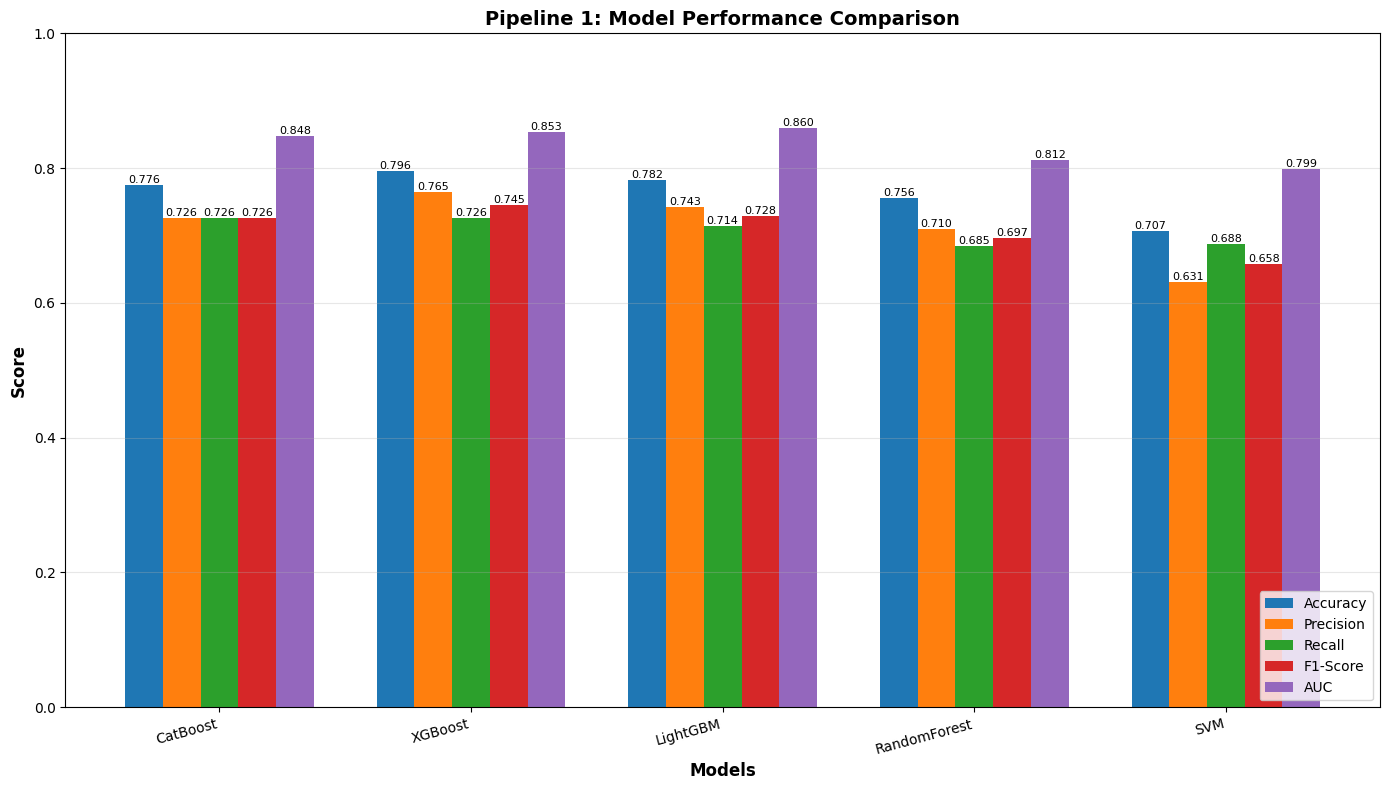


Performance Summary:
------------------------------------------------------------------------------------------
Model                Accuracy     Precision    Recall       F1           AUC         
------------------------------------------------------------------------------------------
CatBoost             0.7756       0.7262       0.7262       0.7262       0.8476      
XGBoost              0.7963       0.7649       0.7262       0.7450       0.8532      
LightGBM             0.7817       0.7430       0.7143       0.7284       0.8597      
RandomForest         0.7561       0.7099       0.6845       0.6970       0.8124      
SVM                  0.7073       0.6311       0.6875       0.6581       0.7990      
------------------------------------------------------------------------------------------

 Best Model: XGBoost (F1-Score: 0.7450)


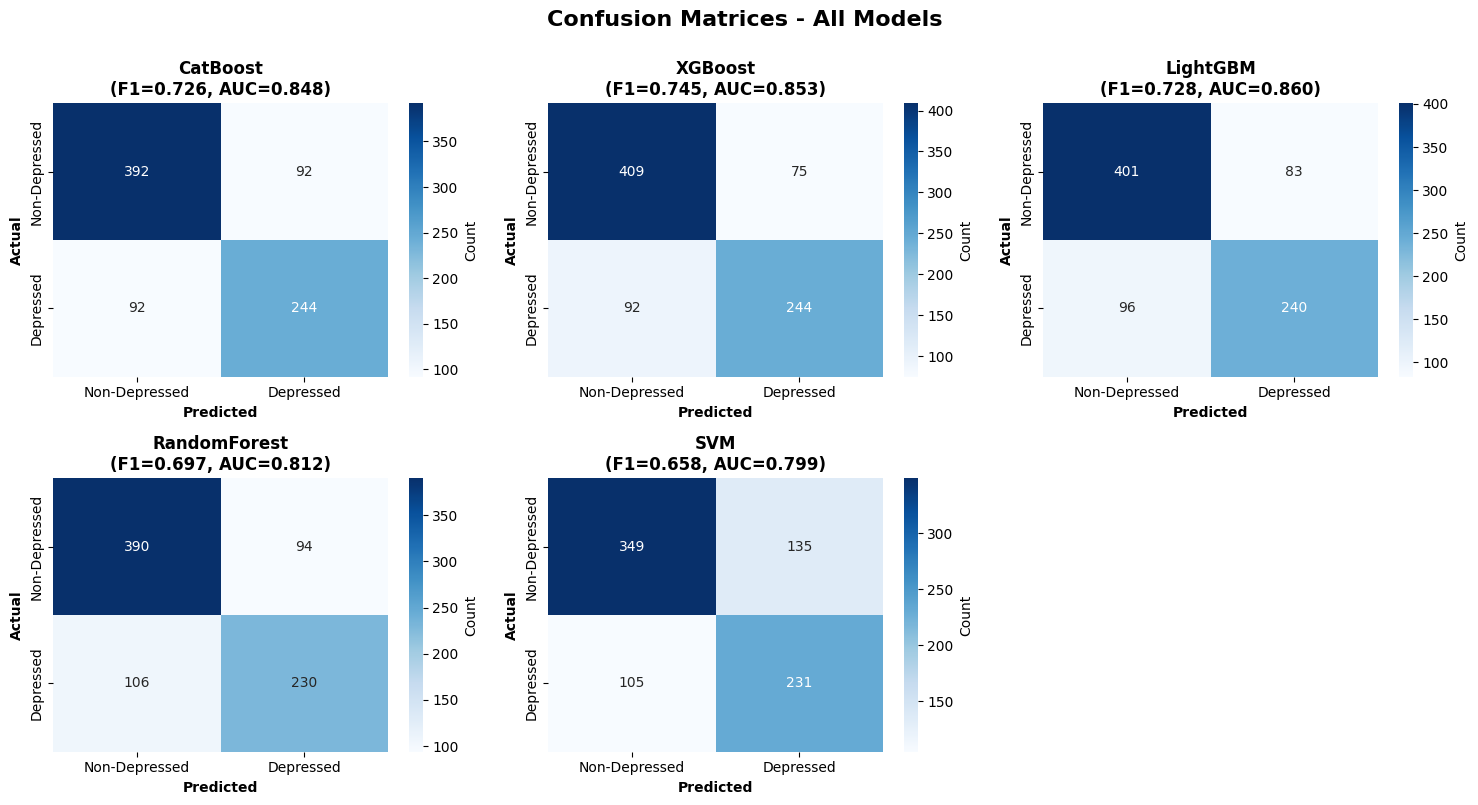


FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features:
----------------------------------------------------------------------
arousal_min                              79.0650
valence_sliding_std_std                  55.9732
arousal_dfa                              55.7571
arousal_lyapunov                         55.7354
arousal_skewness                         52.9759
valence_large_change_rate                46.9249
va_ratio                                 46.7423
arousal_recurrence_rate                  46.2518
valence_range                            45.8574
valence_min                              45.6869
valence_recovery_slope_mean              45.2879
valence_rmssd                            44.9956
arousal_large_change_rate                44.8740
arousal_zero_crossings                   44.0264
arousal_sliding_std_std                  43.8170
sampling_rate_mean                       43.3127
valence_zero_crossings                   43.0129
valence_lyapunov                  

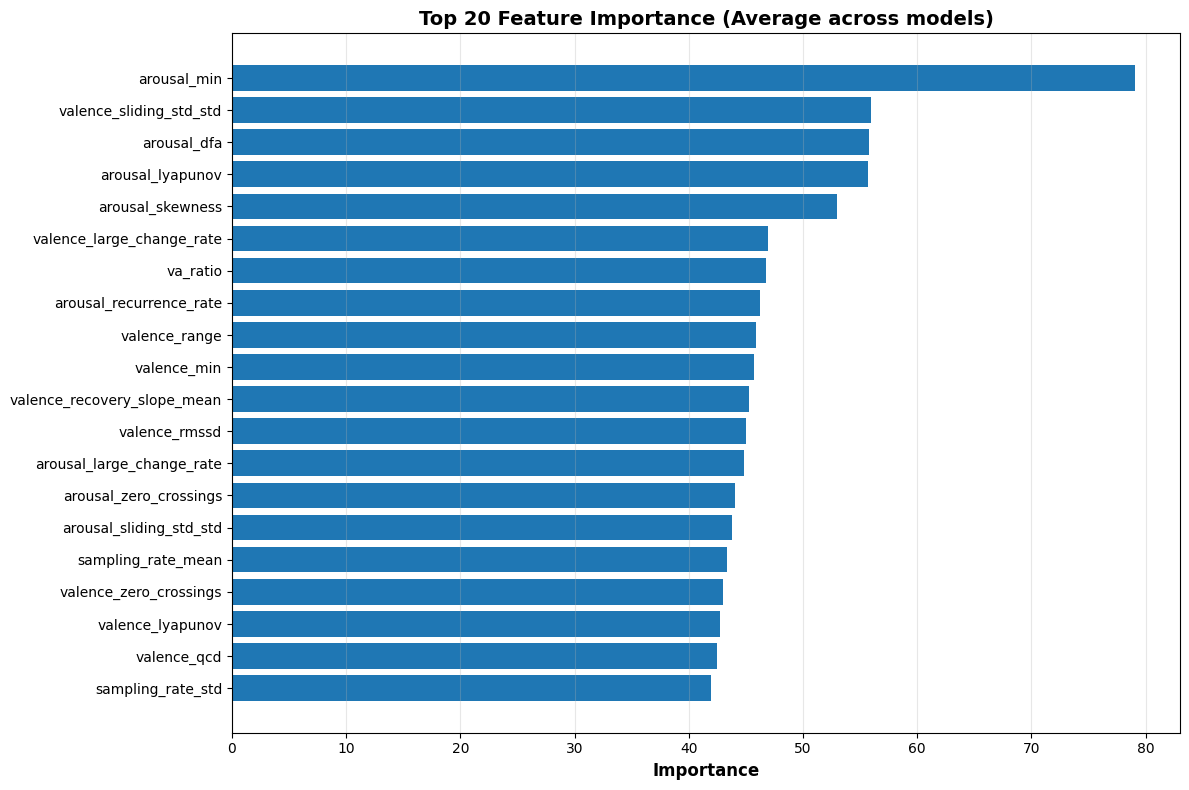


COMPARING ANOVA vs ML FEATURE IMPORTANCE

Overlap giữa top 20 ANOVA và top 20 ML importance: 4/20
Features trùng nhau: ['arousal_dfa', 'arousal_lyapunov', 'arousal_sliding_std_std', 'valence_zero_crossings']

SAVING RESULTS
✓ All results saved successfully!

PIPELINE 1 COMPLETED!

 BEST MODEL: XGBoost
   Accuracy:  0.7963
   Precision: 0.7649
   Recall:    0.7262
   F1-Score:  0.7450
   AUC-ROC:   0.8532

 ANOVA INSIGHTS:
   Features có ý nghĩa p<0.001: 76
   Top feature: arousal_masd (p=1.06e-62)



In [2]:
"""
PIPELINE: FEATURE ENGINEERING + ANOVA ANALYSIS + TRADITIONAL ML
Extract affective dynamics features + ANOVA testing + Train classical ML models

Dataset: E-DAIC with VA predictions

Features:
- Extract comprehensive affective dynamics features from VA time series
- ANOVA analysis to identify statistically significant features
- Train multiple ML models (CatBoost, XGBoost, LightGBM, RF, SVM)
- Compare ANOVA results with ML feature importance
"""

import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# Statistical analysis
from scipy import stats
from scipy.signal import find_peaks
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("PIPELINE 1: FEATURE ENGINEERING + ANOVA + TRADITIONAL ML")
print("="*70)

# ==================== CONFIGURATION ====================
class Config:
    # Paths
    DATA_DIR = "/kaggle/input/va-time-series-affectnet-model-edaic"
    LABEL_FILE = "/kaggle/input/edaic-labels/all_labels_sorted_relabeled.csv"
    
    # Data split
    VAL_SPLIT = 0.15
    TEST_SPLIT = 0.15
    RANDOM_STATE = 42
    
    # Cross-validation
    N_FOLDS = 5
    
    # Output
    OUTPUT_DIR = "/kaggle/working"
    
config = Config()

# ==================== DATA LOADING ====================

def load_labels(label_file):
    """Load PHQ labels"""
    df = pd.read_csv(label_file)
    label_col = 'PHQ8_Binary (relabel)' if 'PHQ8_Binary (relabel)' in df.columns else 'PHQ_Binary (relabel)'
    labels_dict = dict(zip(df['Participant_ID'].astype(str), df[label_col]))
    print(f"✓ Loaded labels for {len(labels_dict)} participants")
    print(f"  Label distribution: {df[label_col].value_counts().to_dict()}")
    return labels_dict

def load_va_segment(file_path):
    """Load single VA time series segment"""
    try:
        df = pd.read_csv(file_path)
        if 'timestamp' in df.columns and 'valence' in df.columns and 'arousal' in df.columns:
            return df[['timestamp', 'valence', 'arousal']].values
        return None
    except Exception as e:
        return None

def load_all_segments(data_dir, labels_dict):
    """Load all VA segments from participant folders"""
    segments = []
    segment_labels = []
    segment_ids = []
    
    participant_ids = list(labels_dict.keys())
    
    for pid in tqdm(participant_ids, desc="Loading segments"):
        folder_name = f"{pid}_P"
        folder_path = os.path.join(data_dir, folder_name)
        
        if not os.path.exists(folder_path):
            continue
        
        segment_files = glob.glob(os.path.join(folder_path, f"{pid}_segment_*_VA_prediction.csv"))
        
        for seg_file in segment_files:
            va_data = load_va_segment(seg_file)
            if va_data is not None and len(va_data) > 10:
                segments.append(va_data)
                segment_labels.append(labels_dict[pid])
                seg_name = os.path.basename(seg_file).replace('.csv', '')
                segment_ids.append(f"{pid}_{seg_name}")
    
    print(f"\n✓ Total segments loaded: {len(segments)}")
    print(f"  Label distribution: {pd.Series(segment_labels).value_counts().to_dict()}")
    
    return segments, segment_labels, segment_ids

# ==================== FEATURE EXTRACTION ====================

def extract_affective_dynamics_features(va_data):
    """
    Extract comprehensive affective dynamics features from VA time series
    """
    features = {}
    
    timestamps = va_data[:, 0]
    valence = va_data[:, 1]
    arousal = va_data[:, 2]
    
    # ===== BASIC STATISTICS =====
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        # Central tendency
        features[f'{name}_mean'] = np.mean(signal)
        features[f'{name}_median'] = np.median(signal)
        features[f'{name}_std'] = np.std(signal)
        features[f'{name}_var'] = np.var(signal)
        features[f'{name}_min'] = np.min(signal)
        features[f'{name}_max'] = np.max(signal)
        features[f'{name}_range'] = np.max(signal) - np.min(signal)
        
        # Percentiles
        features[f'{name}_q25'] = np.percentile(signal, 25)
        features[f'{name}_q50'] = np.percentile(signal, 50)
        features[f'{name}_q75'] = np.percentile(signal, 75)
        features[f'{name}_iqr'] = features[f'{name}_q75'] - features[f'{name}_q25']
        
        # Shape statistics
        features[f'{name}_skewness'] = stats.skew(signal)
        features[f'{name}_kurtosis'] = stats.kurtosis(signal)
        
        # Additional percentiles
        features[f'{name}_q10'] = np.percentile(signal, 10)
        features[f'{name}_q90'] = np.percentile(signal, 90)
        features[f'{name}_q5'] = np.percentile(signal, 5)
        features[f'{name}_q95'] = np.percentile(signal, 95)
    
    # ===== EMOTIONAL INERTIA (Autocorrelation) =====
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        if len(signal) > 1:
            # Lag-1 autocorrelation (primary measure of inertia)
            features[f'{name}_autocorr_lag1'] = pd.Series(signal).autocorr(lag=1)
            
            # Average autocorrelation for lags 1-5
            autocorrs = []
            for lag in range(1, min(6, len(signal))):
                ac = pd.Series(signal).autocorr(lag=lag)
                if not np.isnan(ac):
                    autocorrs.append(ac)
            features[f'{name}_autocorr_mean'] = np.mean(autocorrs) if autocorrs else 0
            
            # Extended autocorrelations
            features[f'{name}_autocorr_lag2'] = pd.Series(signal).autocorr(lag=2) if len(signal) > 2 else 0
            features[f'{name}_autocorr_lag3'] = pd.Series(signal).autocorr(lag=3) if len(signal) > 3 else 0
            
            # Decay rate of autocorrelation
            if len(autocorrs) > 1:
                features[f'{name}_autocorr_decay'] = autocorrs[0] - autocorrs[-1]
            else:
                features[f'{name}_autocorr_decay'] = 0
        else:
            features[f'{name}_autocorr_lag1'] = 0
            features[f'{name}_autocorr_mean'] = 0
            features[f'{name}_autocorr_lag2'] = 0
            features[f'{name}_autocorr_lag3'] = 0
            features[f'{name}_autocorr_decay'] = 0
    
    # ===== EMOTIONAL VARIABILITY =====
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        if len(signal) > 1:
            successive_diffs = np.diff(signal)
            
            # RMSSD: Root Mean Square of Successive Differences
            features[f'{name}_rmssd'] = np.sqrt(np.mean(successive_diffs**2))
            
            # Coefficient of variation
            if features[f'{name}_mean'] != 0:
                features[f'{name}_cv'] = features[f'{name}_std'] / abs(features[f'{name}_mean'])
            else:
                features[f'{name}_cv'] = 0
            
            # Sliding window standard deviation
            window_size = min(10, len(signal) // 3)
            if window_size > 2:
                window_stds = []
                for i in range(len(signal) - window_size + 1):
                    window_stds.append(np.std(signal[i:i+window_size]))
                features[f'{name}_sliding_std_mean'] = np.mean(window_stds)
                features[f'{name}_sliding_std_std'] = np.std(window_stds)
            else:
                features[f'{name}_sliding_std_mean'] = 0
                features[f'{name}_sliding_std_std'] = 0
            
            # Advanced variability measures
            features[f'{name}_mad'] = np.mean(np.abs(signal - np.mean(signal)))
            
            # Quartile coefficient of dispersion
            if features[f'{name}_q75'] + features[f'{name}_q25'] != 0:
                features[f'{name}_qcd'] = (features[f'{name}_q75'] - features[f'{name}_q25']) / \
                                          (features[f'{name}_q75'] + features[f'{name}_q25'])
            else:
                features[f'{name}_qcd'] = 0
        else:
            features[f'{name}_rmssd'] = 0
            features[f'{name}_cv'] = 0
            features[f'{name}_sliding_std_mean'] = 0
            features[f'{name}_sliding_std_std'] = 0
            features[f'{name}_mad'] = 0
            features[f'{name}_qcd'] = 0
    
    # ===== EMOTIONAL INSTABILITY =====
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        if len(signal) > 1:
            successive_diffs = np.diff(signal)
            
            # MSSD: Mean Square Successive Difference
            features[f'{name}_mssd'] = np.mean(successive_diffs**2)
            
            # Mood switches (zero crossings of derivative)
            features[f'{name}_zero_crossings'] = np.sum(np.diff(np.sign(successive_diffs)) != 0)
            
            # Peak detection
            peaks_pos, _ = find_peaks(signal)
            peaks_neg, _ = find_peaks(-signal)
            features[f'{name}_num_peaks'] = len(peaks_pos) + len(peaks_neg)
            features[f'{name}_peak_rate'] = features[f'{name}_num_peaks'] / len(signal)
            
            # Advanced instability measures
            features[f'{name}_masd'] = np.mean(np.abs(successive_diffs))
            features[f'{name}_max_succ_diff'] = np.max(np.abs(successive_diffs))
            
            # Rate of large changes
            threshold = np.std(successive_diffs)
            features[f'{name}_large_change_rate'] = np.sum(np.abs(successive_diffs) > threshold) / len(successive_diffs)
        else:
            features[f'{name}_mssd'] = 0
            features[f'{name}_zero_crossings'] = 0
            features[f'{name}_num_peaks'] = 0
            features[f'{name}_peak_rate'] = 0
            features[f'{name}_masd'] = 0
            features[f'{name}_max_succ_diff'] = 0
            features[f'{name}_large_change_rate'] = 0
    
    # ===== SPECTRAL FEATURES =====
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        if len(signal) > 4:
            # FFT to get frequency components
            fft_vals = np.fft.fft(signal)
            fft_freq = np.fft.fftfreq(len(signal))
            
            # Power spectral density
            power = np.abs(fft_vals)**2
            
            positive_freqs = fft_freq[:len(fft_freq)//2]
            positive_power = power[:len(power)//2]
            if len(positive_power) > 0:
                features[f'{name}_dominant_freq'] = positive_freqs[np.argmax(positive_power)]
                features[f'{name}_spectral_power'] = np.sum(positive_power)
                
                # Spectral entropy
                power_norm = positive_power / np.sum(positive_power)
                power_norm = power_norm[power_norm > 0]
                features[f'{name}_spectral_entropy'] = -np.sum(power_norm * np.log(power_norm))
            else:
                features[f'{name}_dominant_freq'] = 0
                features[f'{name}_spectral_power'] = 0
                features[f'{name}_spectral_entropy'] = 0
        else:
            features[f'{name}_dominant_freq'] = 0
            features[f'{name}_spectral_power'] = 0
            features[f'{name}_spectral_entropy'] = 0
    
    # ===== NONLINEAR DYNAMICS =====
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        if len(signal) > 10:
            # Lyapunov exponent approximation
            try:
                diffs = np.diff(signal)
                log_diffs = np.log(np.abs(diffs[diffs != 0]) + 1e-10)
                features[f'{name}_lyapunov'] = np.mean(log_diffs)
            except:
                features[f'{name}_lyapunov'] = 0
            
            # Recurrence rate
            threshold = 0.1 * np.std(signal)
            recurrence_matrix = np.abs(signal[:, None] - signal[None, :]) < threshold
            features[f'{name}_recurrence_rate'] = np.sum(recurrence_matrix) / (len(signal)**2)
        else:
            features[f'{name}_lyapunov'] = 0
            features[f'{name}_recurrence_rate'] = 0
    
    # ===== RECOVERY FROM EXTREMES =====
    low_threshold = np.percentile(valence, 25)
    median_val = np.median(valence)
    
    recovery_times = []
    in_low = False
    low_start = 0
    
    for i, v in enumerate(valence):
        if v < low_threshold and not in_low:
            in_low = True
            low_start = i
        elif v > median_val and in_low:
            recovery_times.append(i - low_start)
            in_low = False
    
    if recovery_times:
        features['valence_recovery_mean'] = np.mean(recovery_times)
        features['valence_recovery_std'] = np.std(recovery_times)
        features['valence_recovery_count'] = len(recovery_times)
        
        recovery_slopes = []
        for rt in recovery_times:
            if rt > 1:
                recovery_slopes.append((median_val - low_threshold) / rt)
        features['valence_recovery_slope_mean'] = np.mean(recovery_slopes) if recovery_slopes else 0
        features['valence_recovery_efficiency'] = len(recovery_times) / len(valence)
    else:
        features['valence_recovery_mean'] = 0
        features['valence_recovery_std'] = 0
        features['valence_recovery_count'] = 0
        features['valence_recovery_slope_mean'] = 0
        features['valence_recovery_efficiency'] = 0
    
    if recovery_times:
        features['valence_half_life'] = np.median(recovery_times) / 2
    else:
        features['valence_half_life'] = 0
    
    # Time below/above median
    features['valence_time_below_median'] = np.sum(valence < np.median(valence)) / len(valence)
    features['arousal_time_below_median'] = np.sum(arousal < np.median(arousal)) / len(arousal)
    
    # ===== TEMPORAL PATTERNS =====
    quad_1 = np.sum((valence > np.median(valence)) & (arousal > np.median(arousal)))
    quad_2 = np.sum((valence < np.median(valence)) & (arousal > np.median(arousal)))
    quad_3 = np.sum((valence < np.median(valence)) & (arousal < np.median(arousal)))
    quad_4 = np.sum((valence > np.median(valence)) & (arousal < np.median(arousal)))
    
    total = len(valence)
    features['quad_1_ratio'] = quad_1 / total
    features['quad_2_ratio'] = quad_2 / total
    features['quad_3_ratio'] = quad_3 / total
    features['quad_4_ratio'] = quad_4 / total
    
    # Transition probabilities
    if len(valence) > 1:
        quadrants = np.zeros(len(valence), dtype=int)
        for i in range(len(valence)):
            if valence[i] > np.median(valence) and arousal[i] > np.median(arousal):
                quadrants[i] = 1
            elif valence[i] < np.median(valence) and arousal[i] > np.median(arousal):
                quadrants[i] = 2
            elif valence[i] < np.median(valence) and arousal[i] < np.median(arousal):
                quadrants[i] = 3
            else:
                quadrants[i] = 4
        
        transitions = np.sum(np.diff(quadrants) != 0)
        features['quadrant_transitions'] = transitions
        features['quadrant_transition_rate'] = transitions / len(valence)
        
        to_depressed = np.sum((quadrants[:-1] != 3) & (quadrants[1:] == 3))
        from_depressed = np.sum((quadrants[:-1] == 3) & (quadrants[1:] != 3))
        features['transitions_to_depressed'] = to_depressed / len(valence)
        features['transitions_from_depressed'] = from_depressed / len(valence)
    else:
        features['quadrant_transitions'] = 0
        features['quadrant_transition_rate'] = 0
        features['transitions_to_depressed'] = 0
        features['transitions_from_depressed'] = 0
    
    # ===== COMPLEXITY MEASURES =====
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        if len(signal) > 10:
            unique_ratio = len(np.unique(signal)) / len(signal)
            features[f'{name}_complexity'] = unique_ratio
        else:
            features[f'{name}_complexity'] = 0
    
    # Detrended Fluctuation Analysis
    for name, signal in [('valence', valence), ('arousal', arousal)]:
        if len(signal) > 10:
            cumsum = np.cumsum(signal - np.mean(signal))
            x = np.arange(len(cumsum))
            z = np.polyfit(x, cumsum, 1)
            trend = np.polyval(z, x)
            detrended = cumsum - trend
            features[f'{name}_dfa'] = np.sqrt(np.mean(detrended**2))
        else:
            features[f'{name}_dfa'] = 0
    
    # ===== CROSS-SIGNAL FEATURES =====
    if len(valence) > 2:
        features['va_ratio'] = np.mean(valence) / (np.mean(arousal) + 1e-10)
        features['va_product'] = np.mean(valence * arousal)
        
        for lag in [0, 1, 2]:
            if len(valence) > lag:
                if lag == 0:
                    features[f'va_crosscorr_lag{lag}'] = np.corrcoef(valence, arousal)[0, 1]
                else:
                    features[f'va_crosscorr_lag{lag}'] = np.corrcoef(valence[:-lag], arousal[lag:])[0, 1]
            else:
                features[f'va_crosscorr_lag{lag}'] = 0
    else:
        features['va_ratio'] = 0
        features['va_product'] = 0
        for lag in [0, 1, 2]:
            features[f'va_crosscorr_lag{lag}'] = 0
    
    # ===== VA DISTANCE AND DYNAMICS =====
    va_distance = np.sqrt(valence**2 + arousal**2)
    features['va_distance_mean'] = np.mean(va_distance)
    features['va_distance_std'] = np.std(va_distance)
    features['va_distance_max'] = np.max(va_distance)
    features['va_distance_min'] = np.min(va_distance)
    features['va_distance_range'] = features['va_distance_max'] - features['va_distance_min']
    
    if len(valence) > 1:
        va_trajectory = np.sum(np.sqrt(np.diff(valence)**2 + np.diff(arousal)**2))
        features['va_trajectory_length'] = va_trajectory
        features['va_trajectory_rate'] = va_trajectory / len(valence)
        
        if len(valence) > 2:
            accel_v = np.diff(np.diff(valence))
            accel_a = np.diff(np.diff(arousal))
            jerk = np.sqrt(accel_v**2 + accel_a**2)
            features['va_jerk_mean'] = np.mean(jerk)
        else:
            features['va_jerk_mean'] = 0
    else:
        features['va_trajectory_length'] = 0
        features['va_trajectory_rate'] = 0
        features['va_jerk_mean'] = 0
    
    if len(valence) > 2:
        features['va_correlation'] = np.corrcoef(valence, arousal)[0, 1]
    else:
        features['va_correlation'] = 0
    
    # ===== TIME-BASED FEATURES =====
    if len(timestamps) > 1:
        features['duration'] = timestamps[-1] - timestamps[0]
        time_diffs = np.diff(timestamps)
        features['sampling_rate_mean'] = np.mean(time_diffs)
        features['sampling_rate_std'] = np.std(time_diffs)
        features['sampling_rate_cv'] = features['sampling_rate_std'] / (features['sampling_rate_mean'] + 1e-10)
    else:
        features['duration'] = 0
        features['sampling_rate_mean'] = 0
        features['sampling_rate_std'] = 0
        features['sampling_rate_cv'] = 0
    
    # Replace NaN and Inf
    for key in features:
        if np.isnan(features[key]) or np.isinf(features[key]):
            features[key] = 0
    
    return features

# ==================== DATA PREPARATION ====================

def prepare_datasets(segments, labels, config):
    """Prepare feature matrix and labels"""
    print("\n" + "="*70)
    print("FEATURE EXTRACTION")
    print("="*70)
    
    print("\nExtracting affective dynamics features...")
    feature_list = []
    for seg in tqdm(segments, desc="Progress"):
        features = extract_affective_dynamics_features(seg)
        feature_list.append(features)
    
    # Convert to DataFrame
    df_features = pd.DataFrame(feature_list)
    print(f"\n✓ Total features extracted: {df_features.shape[1]}")
    print(f"  Feature names: {list(df_features.columns)[:10]}...")
    
    # Convert to arrays
    X = df_features.values
    y = np.array(labels)
    
    print("\n" + "="*70)
    print("DATA SPLITTING")
    print("="*70)
    
    # Split: train+val vs test
    indices = np.arange(len(y))
    train_val_idx, test_idx = train_test_split(
        indices, test_size=config.TEST_SPLIT, 
        random_state=config.RANDOM_STATE, stratify=y
    )
    
    # Split: train vs val
    y_train_val = y[train_val_idx]
    train_idx, val_idx = train_test_split(
        train_val_idx,
        test_size=config.VAL_SPLIT / (1 - config.TEST_SPLIT),
        random_state=config.RANDOM_STATE,
        stratify=y_train_val
    )
    
    X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
    y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]
    
    print(f"\n✓ Train: {len(y_train)} | Val: {len(y_val)} | Test: {len(y_test)}")
    print(f"  Train labels: {dict(zip(*np.unique(y_train, return_counts=True)))}")
    print(f"  Val labels: {dict(zip(*np.unique(y_val, return_counts=True)))}")
    print(f"  Test labels: {dict(zip(*np.unique(y_test, return_counts=True)))}")
    
    # Normalize features
    print("\nNormalizing features...")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    return {
        'X_train': X_train, 'X_val': X_val, 'X_test': X_test,
        'y_train': y_train, 'y_val': y_val, 'y_test': y_test,
        'scaler': scaler,
        'feature_names': list(df_features.columns),
        'df_features': df_features
    }

# ==================== ANOVA ANALYSIS ====================

def perform_anova_analysis(df_features, labels, top_n=30):
    """
    Phân tích ANOVA để tìm features có sự khác biệt có ý nghĩa thống kê
    """
    print("\n" + "="*70)
    print("ANOVA ANALYSIS - FEATURE DISCRIMINATION")
    print("="*70)
    
    labels = np.array(labels)
    
    # Tách dữ liệu theo nhóm
    group_0 = df_features[labels == 0]
    group_1 = df_features[labels == 1]
    
    print(f"\nSố mẫu:")
    print(f"  Nhóm 0 (Không trầm cảm): {len(group_0)}")
    print(f"  Nhóm 1 (Trầm cảm):       {len(group_1)}")
    
    # Thực hiện ANOVA cho từng feature
    anova_results = []
    
    for feature_name in tqdm(df_features.columns, desc="ANOVA testing"):
        values_0 = group_0[feature_name].values
        values_1 = group_1[feature_name].values
        
        values_0 = values_0[~np.isnan(values_0)]
        values_1 = values_1[~np.isnan(values_1)]
        
        if len(values_0) > 0 and len(values_1) > 0:
            # ANOVA F-test
            f_statistic, p_value = f_oneway(values_0, values_1)
            
            # Statistics
            mean_0 = np.mean(values_0)
            mean_1 = np.mean(values_1)
            std_0 = np.std(values_0)
            std_1 = np.std(values_1)
            
            # Effect size (Cohen's d)
            pooled_std = np.sqrt(((len(values_0)-1)*std_0**2 + (len(values_1)-1)*std_1**2) / 
                                (len(values_0) + len(values_1) - 2))
            cohens_d = (mean_1 - mean_0) / pooled_std if pooled_std > 0 else 0
            
            anova_results.append({
                'feature': feature_name,
                'f_statistic': f_statistic,
                'p_value': p_value,
                'mean_no_depression': mean_0,
                'mean_depression': mean_1,
                'std_no_depression': std_0,
                'std_depression': std_1,
                'mean_difference': mean_1 - mean_0,
                'cohens_d': cohens_d
            })
    
    anova_df = pd.DataFrame(anova_results)
    anova_df = anova_df.sort_values('p_value')
    
    # Significance level
    anova_df['significant'] = anova_df['p_value'].apply(
        lambda x: '***' if x < 0.001 else ('**' if x < 0.01 else ('*' if x < 0.05 else 'ns'))
    )
    
    # Display results
    print(f"\n{'='*90}")
    print(f"Top {top_n} Features với sự khác biệt có ý nghĩa thống kê nhất")
    print(f"{'='*90}")
    print(f"Ý nghĩa: *** p<0.001, ** p<0.01, * p<0.05, ns: không ý nghĩa")
    print(f"{'='*90}")
    
    print(f"\n{'Feature':<35} {'F-stat':<10} {'p-value':<12} {'Sig':<5} {'Cohen-d':<10} {'Δ Mean':<10}")
    print("-" * 90)
    
    for idx, row in anova_df.head(top_n).iterrows():
        print(f"{row['feature']:<35} {row['f_statistic']:<10.4f} {row['p_value']:<12.6f} "
              f"{row['significant']:<5} {row['cohens_d']:<10.4f} {row['mean_difference']:<10.4f}")
    
    # Statistics summary
    print(f"\n{'='*90}")
    print("THỐNG KÊ TỔNG QUAN:")
    print("-" * 90)
    
    n_significant_001 = (anova_df['p_value'] < 0.001).sum()
    n_significant_01 = ((anova_df['p_value'] >= 0.001) & (anova_df['p_value'] < 0.01)).sum()
    n_significant_05 = ((anova_df['p_value'] >= 0.01) & (anova_df['p_value'] < 0.05)).sum()
    n_not_significant = (anova_df['p_value'] >= 0.05).sum()
    
    print(f"Tổng số features:              {len(anova_df)}")
    print(f"Features có ý nghĩa p < 0.001: {n_significant_001} ({n_significant_001/len(anova_df)*100:.1f}%)")
    print(f"Features có ý nghĩa p < 0.01:  {n_significant_01} ({n_significant_01/len(anova_df)*100:.1f}%)")
    print(f"Features có ý nghĩa p < 0.05:  {n_significant_05} ({n_significant_05/len(anova_df)*100:.1f}%)")
    print(f"Features không ý nghĩa:        {n_not_significant} ({n_not_significant/len(anova_df)*100:.1f}%)")
    
    # Effect size
    large_effect = (abs(anova_df['cohens_d']) >= 0.8).sum()
    medium_effect = ((abs(anova_df['cohens_d']) >= 0.5) & (abs(anova_df['cohens_d']) < 0.8)).sum()
    small_effect = ((abs(anova_df['cohens_d']) >= 0.2) & (abs(anova_df['cohens_d']) < 0.5)).sum()
    
    print(f"\nEffect Size (Cohen's d):")
    print(f"Large effect (|d| ≥ 0.8):      {large_effect} features")
    print(f"Medium effect (0.5 ≤ |d| < 0.8): {medium_effect} features")
    print(f"Small effect (0.2 ≤ |d| < 0.5):  {small_effect} features")
    
    return anova_df

def plot_anova_results(anova_df, df_features, labels, config):
    """Visualize ANOVA results"""
    print("\n" + "="*70)
    print("VISUALIZING ANOVA RESULTS")
    print("="*70)
    
    # === PLOT 1: Volcano plot ===
    fig, ax = plt.subplots(figsize=(14, 10))
    
    neg_log_p = -np.log10(anova_df['p_value'].values + 1e-300)
    cohens_d = anova_df['cohens_d'].values
    
    significant = anova_df['p_value'] < 0.05
    large_effect = abs(cohens_d) >= 0.5
    
    colors = []
    for i in range(len(anova_df)):
        if significant.iloc[i] and large_effect[i]:
            colors.append('red')
        elif significant.iloc[i]:
            colors.append('orange')
        else:
            colors.append('lightgray')
    
    ax.scatter(cohens_d, neg_log_p, c=colors, alpha=0.6, s=50)
    
    ax.axhline(y=-np.log10(0.05), color='green', linestyle='--', linewidth=2, label='p=0.05', alpha=0.7)
    ax.axhline(y=-np.log10(0.01), color='orange', linestyle='--', linewidth=2, label='p=0.01', alpha=0.7)
    ax.axhline(y=-np.log10(0.001), color='red', linestyle='--', linewidth=2, label='p=0.001', alpha=0.7)
    ax.axvline(x=0.5, color='blue', linestyle='--', linewidth=1.5, label='|d|=0.5', alpha=0.5)
    ax.axvline(x=-0.5, color='blue', linestyle='--', linewidth=1.5, alpha=0.5)
    
    # Annotate top features
    top_significant = anova_df.head(10)
    for idx, row in top_significant.iterrows():
        d = row['cohens_d']
        p = -np.log10(row['p_value'] + 1e-300)
        feature_name = row['feature']
        
        if len(feature_name) > 25:
            feature_name = feature_name[:22] + '...'
        
        ax.annotate(feature_name, xy=(d, p), xytext=(5, 5),
                   textcoords='offset points', fontsize=8, alpha=0.8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))
    
    ax.set_xlabel("Cohen's d (Effect Size)", fontsize=13, fontweight='bold')
    ax.set_ylabel('-log₁₀(p-value)', fontsize=13, fontweight='bold')
    ax.set_title('Volcano Plot: Effect Size vs Statistical Significance', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(alpha=0.3)
    
    ax.text(0.02, 0.98, 'Đỏ: Có ý nghĩa & effect size lớn\nCam: Có ý nghĩa & effect size nhỏ\nXám: Không có ý nghĩa',
           transform=ax.transAxes, fontsize=10, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(f'{config.OUTPUT_DIR}/anova_volcano_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # === PLOT 2: Feature distributions ===
    top_n = 12
    top_features = anova_df.head(top_n)['feature'].values
    n_cols = 4
    n_rows = (top_n + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
    axes = axes.flatten()
    
    labels = np.array(labels)
    
    for idx, feature_name in enumerate(top_features):
        ax = axes[idx]
        
        values_0 = df_features.loc[labels == 0, feature_name].values
        values_1 = df_features.loc[labels == 1, feature_name].values
        
        values_0 = values_0[~np.isnan(values_0)]
        values_1 = values_1[~np.isnan(values_1)]
        
        ax.hist(values_0, bins=30, alpha=0.6, label='Không trầm cảm', color='blue', density=True)
        ax.hist(values_1, bins=30, alpha=0.6, label='Trầm cảm', color='red', density=True)
        
        row = anova_df[anova_df['feature'] == feature_name].iloc[0]
        title = f"{feature_name}\np={row['p_value']:.4f} {row['significant']}, d={row['cohens_d']:.3f}"
        
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlabel('Giá trị', fontsize=9)
        ax.set_ylabel('Mật độ', fontsize=9)
        ax.legend(fontsize=8)
        ax.grid(alpha=0.3)
    
    for idx in range(top_n, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'Phân phối Top {top_n} Features có sự khác biệt lớn nhất', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(f'{config.OUTPUT_DIR}/anova_feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # === PLOT 3: Boxplots ===
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
    axes = axes.flatten()
    
    for idx, feature_name in enumerate(top_features):
        ax = axes[idx]
        
        data_plot = pd.DataFrame({
            'Value': df_features[feature_name].values,
            'Group': ['Không trầm cảm' if l == 0 else 'Trầm cảm' for l in labels]
        })
        
        sns.boxplot(data=data_plot, x='Group', y='Value', ax=ax, 
                   palette=['lightblue', 'lightcoral'])
        
        row = anova_df[anova_df['feature'] == feature_name].iloc[0]
        title = f"{feature_name}\nF={row['f_statistic']:.2f}, p={row['p_value']:.4f} {row['significant']}"
        
        ax.set_title(title, fontsize=9, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Giá trị', fontsize=9)
        ax.tick_params(axis='x', rotation=15)
        ax.grid(axis='y', alpha=0.3)
    
    for idx in range(top_n, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'Boxplot Comparison - Top {top_n} Discriminative Features', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(f'{config.OUTPUT_DIR}/anova_boxplot_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==================== MODEL TRAINING ====================

def train_models(data, config):
    """Train multiple ML models"""
    print("\n" + "="*70)
    print("TRAINING MACHINE LEARNING MODELS")
    print("="*70)
    
    models = {}
    
    # Class weights
    class_counts = np.bincount(data['y_train'])
    total = len(data['y_train'])
    scale_pos_weight = class_counts[0] / class_counts[1]
    
    print(f"\nClass distribution: {dict(zip(*np.unique(data['y_train'], return_counts=True)))}")
    print(f"Scale pos weight: {scale_pos_weight:.2f}")
    
    # CatBoost
    print("\n[1/5] Training CatBoost...")
    catboost = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        l2_leaf_reg=3,
        loss_function='Logloss',
        eval_metric='AUC',
        random_seed=config.RANDOM_STATE,
        verbose=100,
        early_stopping_rounds=50,
        class_weights={0: total/(2*class_counts[0]), 1: total/(2*class_counts[1])}
    )
    catboost.fit(data['X_train'], data['y_train'], 
                 eval_set=(data['X_val'], data['y_val']))
    models['CatBoost'] = catboost
    
    # XGBoost
    print("\n[2/5] Training XGBoost...")
    xgboost = xgb.XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        random_state=config.RANDOM_STATE,
        eval_metric='auc',
        early_stopping_rounds=50
    )
    xgboost.fit(data['X_train'], data['y_train'],
                eval_set=[(data['X_val'], data['y_val'])],
                verbose=100)
    models['XGBoost'] = xgboost
    
    # LightGBM
    print("\n[3/5] Training LightGBM...")
    lightgbm = lgb.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        random_state=config.RANDOM_STATE,
        verbosity=1
    )
    lightgbm.fit(data['X_train'], data['y_train'],
                 eval_set=[(data['X_val'], data['y_val'])],
                 eval_metric='auc',
                 callbacks=[lgb.early_stopping(50)])
    models['LightGBM'] = lightgbm
    
    # Random Forest
    print("\n[4/5] Training Random Forest...")
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=config.RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )
    rf.fit(data['X_train'], data['y_train'])
    models['RandomForest'] = rf
    
    # SVM
    print("\n[5/5] Training SVM...")
    svm = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        random_state=config.RANDOM_STATE,
        probability=True,
        verbose=False
    )
    svm.fit(data['X_train'], data['y_train'])
    models['SVM'] = svm
    
    print("\n✓ All models trained successfully!")
    
    return models

# ==================== EVALUATION ====================

def evaluate_models(models, data):
    """Evaluate all models on test set"""
    print("\n" + "="*70)
    print("MODEL EVALUATION")
    print("="*70)
    
    results = {}
    
    for name, model in models.items():
        print(f"\n{name}:")
        
        y_pred = model.predict(data['X_test'])
        y_pred_proba = model.predict_proba(data['X_test'])[:, 1]
        
        accuracy = accuracy_score(data['y_test'], y_pred)
        precision = precision_score(data['y_test'], y_pred, zero_division=0)
        recall = recall_score(data['y_test'], y_pred, zero_division=0)
        f1 = f1_score(data['y_test'], y_pred, zero_division=0)
        auc = roc_auc_score(data['y_test'], y_pred_proba)
        
        print(f"  Accuracy:  {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall:    {recall:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        print(f"  AUC-ROC:   {auc:.4f}")
        
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
    
    return results

# ==================== FEATURE IMPORTANCE ====================

def analyze_feature_importance(models, data, top_n=20):
    """Analyze and visualize feature importance"""
    print("\n" + "="*70)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*70)
    
    importance_dict = {}
    
    for name in ['CatBoost', 'XGBoost', 'LightGBM', 'RandomForest']:
        if name in models:
            importance = models[name].feature_importances_
            importance_dict[name] = importance
    
    # Average importance
    avg_importance = np.mean(list(importance_dict.values()), axis=0)
    
    importance_df = pd.DataFrame({
        'feature': data['feature_names'],
        'importance': avg_importance
    })
    importance_df = importance_df.sort_values('importance', ascending=False)
    
    print(f"\nTop {top_n} Most Important Features:")
    print("-" * 70)
    for idx, row in importance_df.head(top_n).iterrows():
        print(f"{row['feature']:<40} {row['importance']:.4f}")
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    top_features = importance_df.head(top_n)
    ax.barh(range(len(top_features)), top_features['importance'])
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features['feature'])
    ax.invert_yaxis()
    ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {top_n} Feature Importance (Average across models)', 
                 fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{config.OUTPUT_DIR}/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return importance_df

# ==================== VISUALIZATION ====================

def plot_model_comparison(results, data):
    """Compare all models"""
    print("\n" + "="*70)
    print("MODEL COMPARISON")
    print("="*70)
    
    models = list(results.keys())
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    
    data_dict = {
        'Accuracy': [results[m]['accuracy'] for m in models],
        'Precision': [results[m]['precision'] for m in models],
        'Recall': [results[m]['recall'] for m in models],
        'F1-Score': [results[m]['f1'] for m in models],
        'AUC': [results[m]['auc'] for m in models]
    }
    
    fig, ax = plt.subplots(figsize=(14, 8))
    x = np.arange(len(models))
    width = 0.15
    
    for i, metric in enumerate(metrics):
        offset = width * (i - 2)
        bars = ax.bar(x + offset, data_dict[metric], width, label=metric)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=8)
    
    ax.set_xlabel('Models', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title('Pipeline 1: Model Performance Comparison', 
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=15, ha='right')
    ax.legend(loc='lower right')
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1.0])
    
    plt.tight_layout()
    plt.savefig(f'{config.OUTPUT_DIR}/model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Summary table
    print("\nPerformance Summary:")
    print("-" * 90)
    print(f"{'Model':<20} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1':<12} {'AUC':<12}")
    print("-" * 90)
    
    for model_name in models:
        res = results[model_name]
        print(f"{model_name:<20} {res['accuracy']:<12.4f} {res['precision']:<12.4f} "
              f"{res['recall']:<12.4f} {res['f1']:<12.4f} {res['auc']:<12.4f}")
    print("-" * 90)
    
    best_model = max(results.items(), key=lambda x: x[1]['f1'])
    print(f"\n Best Model: {best_model[0]} (F1-Score: {best_model[1]['f1']:.4f})")

def plot_confusion_matrices(results, data):
    """Plot confusion matrices for all models"""
    n_models = len(results)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
    axes = axes.flatten() if n_models > 1 else [axes]
    
    for idx, (name, res) in enumerate(results.items()):
        cm = confusion_matrix(data['y_test'], res['y_pred'])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   xticklabels=['Non-Depressed', 'Depressed'],
                   yticklabels=['Non-Depressed', 'Depressed'],
                   cbar_kws={'label': 'Count'})
        
        axes[idx].set_xlabel('Predicted', fontweight='bold')
        axes[idx].set_ylabel('Actual', fontweight='bold')
        axes[idx].set_title(f'{name}\n(F1={res["f1"]:.3f}, AUC={res["auc"]:.3f})', 
                           fontweight='bold')
    
    for idx in range(n_models, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig(f'{config.OUTPUT_DIR}/confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()



# ==================== MAIN PIPELINE ====================

def main():
    """Main Pipeline 1 with ANOVA Analysis"""
    print("="*70)
    print("PIPELINE 1: FEATURE ENGINEERING + ANOVA + TRADITIONAL ML")
    print("="*70)
    
    print("\nPipeline Steps:")
    print("1. Extract affective dynamics features")
    print("2. ANOVA analysis for feature discrimination")
    print("3. Train multiple ML models")
    print("4. Evaluate and compare models")
    print("5. Analyze feature importance")
    print("="*70)
    
    np.random.seed(config.RANDOM_STATE)
    
    # Load data
    print("\n" + "="*70)
    print("LOADING DATA")
    print("="*70)
    labels_dict = load_labels(config.LABEL_FILE)
    segments, labels, segment_ids = load_all_segments(config.DATA_DIR, labels_dict)
    
    # Prepare datasets
    data = prepare_datasets(segments, labels, config)
    
    # ANOVA Analysis
    anova_df = perform_anova_analysis(data['df_features'], labels, top_n=30)
    plot_anova_results(anova_df, data['df_features'], labels, config)
    
    # Train models
    models = train_models(data, config)
    
    # Evaluate
    results = evaluate_models(models, data)
    
    # Visualizations
    print("\n" + "="*70)
    print("GENERATING MODEL VISUALIZATIONS")
    print("="*70)
    
    plot_model_comparison(results, data)
    plot_confusion_matrices(results, data)
    importance_df = analyze_feature_importance(models, data, top_n=20)
    
    # Compare ANOVA vs ML importance
    print("\n" + "="*70)
    print("COMPARING ANOVA vs ML FEATURE IMPORTANCE")
    print("="*70)
    
    top_anova = set(anova_df.head(20)['feature'])
    top_ml = set(importance_df.head(20)['feature'])
    
    overlap = top_anova.intersection(top_ml)
    print(f"\nOverlap giữa top 20 ANOVA và top 20 ML importance: {len(overlap)}/20")
    print(f"Features trùng nhau: {sorted(overlap)}")
    
    # Save results
    print("\n" + "="*70)
    print("SAVING RESULTS")
    print("="*70)
    
    import pickle
    with open(f'{config.OUTPUT_DIR}/pipeline1_models.pkl', 'wb') as f:
        pickle.dump({
            'models': models,
            'scaler': data['scaler'],
            'feature_names': data['feature_names']
        }, f)
    
    anova_df.to_csv(f'{config.OUTPUT_DIR}/anova_results.csv', index=False)
    importance_df.to_csv(f'{config.OUTPUT_DIR}/feature_importance.csv', index=False)
    
    results_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[m]['accuracy'] for m in results.keys()],
        'Precision': [results[m]['precision'] for m in results.keys()],
        'Recall': [results[m]['recall'] for m in results.keys()],
        'F1-Score': [results[m]['f1'] for m in results.keys()],
        'AUC-ROC': [results[m]['auc'] for m in results.keys()]
    })
    results_df.to_csv(f'{config.OUTPUT_DIR}/results_summary.csv', index=False)
    
    print("✓ All results saved successfully!")
    
    # Final summary
    best_model = max(results.items(), key=lambda x: x[1]['f1'])
    print("\n" + "="*70)
    print("PIPELINE 1 COMPLETED!")
    print("="*70)
    print(f"\n BEST MODEL: {best_model[0]}")
    print(f"   Accuracy:  {best_model[1]['accuracy']:.4f}")
    print(f"   Precision: {best_model[1]['precision']:.4f}")
    print(f"   Recall:    {best_model[1]['recall']:.4f}")
    print(f"   F1-Score:  {best_model[1]['f1']:.4f}")
    print(f"   AUC-ROC:   {best_model[1]['auc']:.4f}")
    
    print(f"\n ANOVA INSIGHTS:")
    print(f"   Features có ý nghĩa p<0.001: {(anova_df['p_value'] < 0.001).sum()}")
    print(f"   Top feature: {anova_df.iloc[0]['feature']} (p={anova_df.iloc[0]['p_value']:.2e})")
    print("\n" + "="*70)

if __name__ == "__main__":
    main()